<a href="https://colab.research.google.com/github/dsliwka/EEMP2022/blob/main/notebooks/KNN2022Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
n = 300
df = pd.DataFrame(index=range(n))
df['age'] = np.random.uniform(18, 70, size = n)
df['income'] = (4*df['age']-0.04*df['age']**2 + np.random.normal(0,10,n))

In [ ]:
X = df[['age']]
y = df['income']

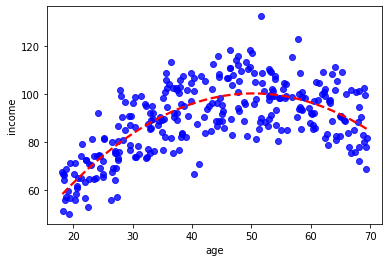

In [ ]:
sns.regplot(x='age', y='income', data=df, order=2, ci=None,
            scatter_kws={'color':'blue'},
            line_kws={'color':'red', 'ls':'--'})


In [ ]:
knn=KNeighborsRegressor(n_neighbors=50).fit(X,y)

y_pred= knn.predict(X)

print(mean_squared_error(y,y_pred))
print(r2_score(y,y_pred))


100.70738493439539
0.558037992394331


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


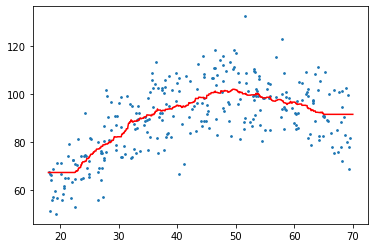

In [ ]:
plt.scatter(X,y, s=3)
X_range= np.linspace(18,70,1000).reshape(-1,1)
y_range= knn.predict(X_range)
plt.plot(X_range,y_range, color="red")